<a href="https://colab.research.google.com/github/virf96/Analisis_Texto/blob/master/PreprocesadoTextos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocesamiento de textos

### Procesamiento del Lenguaje Natural

**Vanessa Gómez Verdejo,  Pablo Martínez Olmos, Emilio Parrado Hernández**

Departamento de Teoría de la Señal y Comunicaciones

**Universidad Carlos III de Madrid**

<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />


In [ ]:
%matplotlib inline  
# Figures plotted inside the notebook
%config InlineBackend.figure_format = 'svg'  
# High quality figures
import matplotlib.pyplot as plt
import numpy as np
import time

# Introducción

En general, gran parte de la forma en que nos comunicamos hoy en día es a través de texto, ya sea en servicios de mensajería, medios sociales y/o correo electrónico. Así, por ejemplo, en servicios/aplicaciones como TripAdvisor, Booking, Amazon, etc., los usuarios escriben reseñas de restaurantes/negocios, hoteles, productos para compartir sus opiniones sobre su experiencia. Estas reseñas, todas escritas en formato de texto plano, contienen una gran cantidad de información que sería útil responder preguntas relevantes para el negocio usando métodos de aprendizaje automático, por ejemplo, para predecir el mejor restaurante en una determinada zona o, incluso, cuál se adapta mejor a mis necesidades, saber si las reviews de TripAdvisor o Booking son positivas o negativas (*Sentiment Analysis*), o analizar noticias (detectar *fake news*).

Para poder trabajar con esta información, a partir de estos textos sin formatear, tenemos que extraer la información necesaria (a poder ser incluyendo contenido semántico) y vectorizarla adecuadamente para alimentar con ella modelos basados en aprendizaje automático.

Este tipo de tarea (preprocesamiento) se denomina **procesamiento del lenguaje natural** (Natural Language Processing, NLP).
El NLP es un subcampo de la lingüística, la informática y la inteligencia artificial que se ocupa de las interacciones entre los ordenadores (o procesadores) y el lenguaje humano; en particular engloba un conjunto de técnicas para permitir que los ordenadores procesen y analicen grandes cantidades de texto.

En este curso veremos diferentes técnicas y modelos de aprendizaje para extraer toda la información posible de colecciones de textos y darle un valor añadido, pero en esta sesión vamos a centrarnos en el preprocesamiento de esta información. Cómo hacer que esta información, tan heterogénea, en ocasiones ruidosa y normalmente no estructurada, pase a tener un formato de utilidad para nuestros modelos de aprendizaje.



# Pipeline para el procesamiento de texto 

Como sabemos, los algoritmos de ML procesan números, no palabras, por lo que necesitamos transformar el texto en números significativos que contengan la información relevante de los documentos. Este proceso de conversión de texto a números es lo que llamaremos **vectorización**. 

No obstante, para tener una representación útil, se requieren normalmente algunos pasos de **preprocesamiento** previo que limpien y homogeneicen los documentos: tokenización, eliminación de *stop-words*, lematización, etc.
La siguiente figura muestra los diferentes pasos que debemos seguir para procesar nuestros documentos hasta poder ser utilizados por nuestro modelo de aprendizaje:

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/BBVA/NLP/PipelineNLP.png" width="80%"> 

A lo largo de este notebook, veremos algunas de las herramientas que tenemos disponibles en Python para llevar a cabo todos estos pasos previos al despliegue de los modelos de aprendizaje automático o estadístico. Concretamente, nos centraremos en el uso de estas librerias:
* [NLTK, Natural Language ToolKit](https://www.nltk.org/). Esta libreria es una excelente biblioteca de NLP escrita en Python por expertos tanto del mundo académico como de la industria. NLTK permite crear aplicaciones con datos textuales rápidamente, ya que proporciona un conjunto de clases básicas para trabajar con corpus de datos, incluyendo colecciones de textos (corpus), listas de palabras clave, clases para representar y operar con datos de tipo texto (documentos, frases, palabras, ...) y funciones para realizar tareas comunes de NLP (conversión a token, conteo de palabras, ...). NLTK va a ser de gran ayuda para el preprocesamiento de los documentos.


* [Gensim](https://pypi.org/project/gensim/) es otra librería de Python para la realización de modelado por temáticas (*topic modeling*), la indexación de documentos y tareas de recuperación de la información a partir de documentos. Está diseñada para operar con grandes cantidades de información (con implementaciones eficientes y paralelizables/distribuidas) y nos va a ser de gran ayuda para la vectorización de nuestros corpus de datos una vez preprocesados.

* [Sklearn](https://scikit-learn.org/stable/index.html). Sklearn es una librería destinada principalmente al diseño de modelos de aprendizaje automático para clasificación y regresión, pero también incluye algunas fucionalidades para el preprocesamiento de textos que revisaremos más adelante.

Además existen otras librerías como [Spacy](https://spacy.io/), [CoreNLP](https://stanfordnlp.github.io/CoreNLP/), [Huggin Face](https://huggingface.co/transformers/) o paquetes incluidos en Pytorch, Tensorflow que nos permiten realizar parte de estas tareas, pero que introduciremos más adelante en otras sesiones de este curso.

Empecemos este notebook cargando la librería NLTK y algunas de sus funcionalidades. A continuación, elegiremos un corpus de datos con el que empezar a analizar las funcionalidades básicas que aportan NLTK, Gensim y Sklearn para el preprocesado de documentos y  veremos, uno por uno, en qué consisten los diferentes pasos de nuestro pipeline y cómo podemos implementarlos.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# 1. Cargando nuestro corpus de datos

NLTK incluye diferentes corpus de datos  con los que podemos probar nuestras herramientas. Podemos encontrar información de todos ellos en [NLTK corpus](https://www.nltk.org/book/ch02.html).



## El objeto CorpusReader
Para empezar a trabajar vamos a usar el corpus **movie reviews**, uno de los corpus de datos incluidos en NLTK y que consiste en 2000 documentos de texto con reviews de diferentes películas donde además se indica si estas reviews son positivas o negativas.

La siguiente celda de código nos muestra cómo cargar el corpus...

In [ ]:
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')
movie_reviews

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


<CategorizedPlaintextCorpusReader in '/root/nltk_data/corpora/movie_reviews'>

Al cargar el corpus, se genera un objeto de tipo `CorpusReader`, llamado `movie_reviews`, con el contenido del mismo. Dado que un corpus es una colección de documentos/textos, podemos ver qué documentos componen este corpus usando la función `.fileids()`.

In [ ]:
len(movie_reviews.fileids())

2000

In [ ]:
movie_reviews.fileids()[:10]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt',
 'neg/cv005_29357.txt',
 'neg/cv006_17022.txt',
 'neg/cv007_4992.txt',
 'neg/cv008_29326.txt',
 'neg/cv009_29417.txt']

También podemos ver las categorías de este problema con el atributo `.categories()`.

In [ ]:
movie_reviews.categories()

['neg', 'pos']

In [ ]:
movie_reviews.categories('neg/cv000_29416.txt')

['neg']

Por otro lado podemos usar la función `.words()` de `movie_reviews` para acceder a las palabras que componen los documentos del corpus. 

In [ ]:
print(movie_reviews.words())
print(len(movie_reviews.words()))

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]
1583820


Incluso, podemos acceder a estas palabras filtrando por una categoría

In [ ]:
movie_reviews.words(categories='pos')

['films', 'adapted', 'from', 'comic', 'books', 'have', ...]

Si queremos podemos acceder a un **documento** concreto del corpus y extraer su contenido en crudo con la función `.raw()`. 

In [ ]:
raw_text = movie_reviews.raw('neg/cv007_4992.txt')
print(raw_text)

that's exactly how long the movie felt to me . 
there weren't even nine laughs in nine months . 
it's a terrible mess of a movie starring a terrible mess of a man , mr . hugh grant , a huge dork . 
it's not the whole oral-sex/prostitution thing ( referring to grant , not me ) that bugs me , it's the fact that grant is annoying . 
not just adam sandler-annoying , we're talking jim carrey-annoying . 
since when do eye flutters and nervous smiles pass for acting ? 
but , on the other hand , since when do really bad slapstick ( a fistfight in the delivery room culminating in grant's head in joan cusack's lap--a scene he paid $60 to have included in the movie ) and obscene double entendres ( robin williams , the obstetrician , tells grant's pregnant girlfriend she has " a big pussy , " referring of course to the size of the cat hairs on her coat , but nonetheless , grant paid $60 to have the exchange included in the movie ) pass for comedy ? 
nine months is a predictable cookie-cutter movie

Ahora en la variable `raw_text` tenemos un array de caracteres o *string* (con todas las funciones de los tipos *string*). Por ejemplo, podemos ver los primeros 40 caracteres de este documento como:

In [ ]:
print(type(raw_text))

print(raw_text[:40])

print('\n The total number of characters in the document is %d' %(len(raw_text)))

<class 'str'>
that's exactly how long the movie felt t

 The total number of characters in the document is 3554


El CorpusReader también nos permite cargar documentos estructurados por **frases**. Para ello tenemos que usar la función `.sents()`.

In [ ]:
movie_reviews_sents = movie_reviews.sents('neg/cv000_29416.txt')
print('\n The total number of sentences in the document is %d' %(len(movie_reviews_sents)))
print(movie_reviews_sents[:5])


 The total number of sentences in the document is 35
[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.'], ['one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.'], ['what', "'", 's', 'the', 'deal', '?'], ['watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.']]


O, directamente, cargarlo a nivel de **palabras** (o **tokens**) usando el método `.words()`. Nótese que cuando hablamos de palabra o token no sólo son palabras con significado, sino que pueden ser números o signos de puntuación.

In [ ]:
review_words = movie_reviews.words('neg/cv000_29416.txt')
print('\n The total number of words in the document is %d' %(len(review_words)))
print(review_words[:5])


 The total number of words in the document is 879
['plot', ':', 'two', 'teen', 'couples']


# 2. Preprocesado del corpus

Antes de transformar los datos de entrada de texto en una representación vectorial, necesitamos estructurar y limpiar el texto, y conservar toda la información que permita capturar el contenido semántico del corpus. Normalmente, se obtiene un vector por cada texto, pero dependiendo de la aplicación podría interesar obtener un vector por cada frase, por cada párrafo o, incluso, por cada palabra.

Para ello, el procesado típico de NLP aplica los siguientes pasos:

1. Tokenización
2. Limpieza
3. Homogeneización

Nótese que, aunque aquí definamos esta secuencia de pasos, iremos viendo que dependiendo de cómo se apliquen su orden puede variar.

## 2.1. Tokenization

**Tokenización** es el proceso de dividir el texto dado en piezas más pequeñas llamadas tokens. Las palabras, los números, los signos de puntuación y otros pueden ser considerados como tokens.

Ya hemos visto que el objeto `CorpusReader` incluye funciones para dividir el corpus en frases o palabras. Pero NLTK incluye también funciones genéricas para hacer estas operaciones sobre cualquier cadena de texto. En concreto, tiene dos funciones:
- `sent_tokenize`: es un tokenizador de frases. Este tokenizador divide un texto en una lista de oraciones. Para decidir dónde empieza o acaba una frase NLTK tiene un modelo pre-entrenado para el idioma específico en el que estemos trabajando. Este modelo lo hemos cargado al principio con `nltk.download('punkt')`.
- `word_tokenize`/`wordpunct_tokenize`:  Divide un texto en palabras u otros caracteres individuales como pueden ser signos de puntuación.

Veamos ejemplos de empleo de estas funciones con el siguiente texto:

In [ ]:
# Define a text as a string
texto = 'I\'m a dog and it\'s great! You\'re cool and Sandy\'s book is big. Don\'t tell her, you\'ll regret it! "Hey", she\'ll say!'
print(texto)

I'm a dog and it's great! You're cool and Sandy's book is big. Don't tell her, you'll regret it! "Hey", she'll say!


In [ ]:
# Divide the text into sentences
sent=nltk.sent_tokenize(texto)
print(sent)

["I'm a dog and it's great!", "You're cool and Sandy's book is big.", "Don't tell her, you'll regret it!", '"Hey", she\'ll say!']


In [ ]:
# Divide the text into tokens, using as splitter white spaces and punctuation
sent_tokens1=nltk.wordpunct_tokenize(texto)
print(sent_tokens1)

['I', "'", 'm', 'a', 'dog', 'and', 'it', "'", 's', 'great', '!', 'You', "'", 're', 'cool', 'and', 'Sandy', "'", 's', 'book', 'is', 'big', '.', 'Don', "'", 't', 'tell', 'her', ',', 'you', "'", 'll', 'regret', 'it', '!', '"', 'Hey', '",', 'she', "'", 'll', 'say', '!']


In [ ]:
# Divide the text into tokens, using as splitter white spaces, but punctuation
# of contractions are not included
sent_tokens2=nltk.word_tokenize(texto)
print(sent_tokens2)

['I', "'m", 'a', 'dog', 'and', 'it', "'s", 'great', '!', 'You', "'re", 'cool', 'and', 'Sandy', "'s", 'book', 'is', 'big', '.', 'Do', "n't", 'tell', 'her', ',', 'you', "'ll", 'regret', 'it', '!', '``', 'Hey', "''", ',', 'she', "'ll", 'say', '!']


Aunque puede parecer que las funciones `wordpunct_tokenize` y `word_tokenize` hacen lo mismo, con este ejemplo vemos que `wordpunct_tokenize` permite separar los signos de puntuación mientras que `word_tokenize` no.  Nótese la diferencia al dividir `I'm` entre ambas funciones.

También podemos combinar `sent_tokenize` y `word_tokenize` para dividir el texto en frases y que cada frase sea dividida en tokens:

In [ ]:
for sent in nltk.sent_tokenize(texto):
    print(nltk.wordpunct_tokenize(sent))
    print("**************")

['I', "'", 'm', 'a', 'dog', 'and', 'it', "'", 's', 'great', '!']
**************
['You', "'", 're', 'cool', 'and', 'Sandy', "'", 's', 'book', 'is', 'big', '.']
**************
['Don', "'", 't', 'tell', 'her', ',', 'you', "'", 'll', 'regret', 'it', '!']
**************
['"', 'Hey', '",', 'she', "'", 'll', 'say', '!']
**************


#### Ejercicio 1: Tokenización del texto



Seleccionemos ahora uno de los textos de nuestro corpus y veamos cómo tokenizarlo:

In [ ]:
# Get a text
movie_text = movie_reviews.raw('neg/cv000_29416.txt')
movie_text

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

Complete las siguientes celdas de código para dividir el texto en tokens (usando la función `wordpunct_tokenize`) e imprima los tokens  resultantes

In [ ]:
#<SOL>
# Divide into words
movie_tokens=nltk.wordpunct_tokenize(movie_text)
print(movie_tokens)
#</SOL>

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.', 'they', 'get', 'into', 'an', 'accident', '.', 'one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.', 'what', "'", 's', 'the', 'deal', '?', 'watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.', '.', '.', 'critique', ':', 'a', 'mind', '-', 'fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', ',', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', '.', 'which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', ',', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', ',', 'mess', 'with', 'your', 'head', 'and', 'such', '(', 'lost', 'highway', '&', 'memento', ')', ',', 'but', 'there', 'are', 'good', 'and', 'ba

## 2.2. Limpieza y homogeneización

Al observar los tokens del corpus podemos ver que hay muchos tokens con algunas letras en mayúsculas y otras en minúsculas, el mismo token unas veces aparece en singular y otras en plural, o el mismo verbo que aparece en diferentes tiempos verbales. Para analizar semánticamente el texto, nos interesa  **homogeneizar** las palabras que formalmente son diferentes pero tienen el mismo significado. En este proceso, lógicamente, estamos perdiendo información de estilo, matices o la intención del escritor u otros aspectos; sin embargo, lo que nos importa es el contenido (temática) del texto y de este modo lo vamos a reforzar para la posterior vectorización.

Para ello podemos usar las herramientas de lematización de NLTK. El proceso habitual de homogeneización consiste en los siguientes pasos:

1. Eliminación de mayúsculas y caracteres no alfanuméricos: de este modo los caracteres alfabéticos en mayúsculas se transformarán en sus correspondientes caracteres en minúsculas y  se eliminarán los caracteres no alfanuméricos, por ejemplo, los signos de puntuación.

2. Limpieza: este paso del preprocesado consiste en eliminar las palabras irrelevantes o **stop words** de los documentos. 


3. Stemming/Lematización: eliminar las terminaciones de las palabras para preservar la raíz de las palabras e ignorar la información gramatical (eliminamos marcas de plurales, género, conjugaciones verbales, ...).

En este paso, podemos detectar typos, *misspellings*, faltas de ortografía, etc. que podríamos corregir.

Veamos cómo ir aplicando uno a uno cada uno de estos pasos sobre el texto anterior.

In [ ]:
# Get and tokenize the text
movie_text = movie_reviews.raw ('neg/cv003_12683.txt')
movie_tokens=nltk.wordpunct_tokenize(movie_text)
print(movie_tokens)


['"', 'quest', 'for', 'camelot', '"', 'is', 'warner', 'bros', '.', "'", 'first', 'feature', '-', 'length', ',', 'fully', '-', 'animated', 'attempt', 'to', 'steal', 'clout', 'from', 'disney', "'", 's', 'cartoon', 'empire', ',', 'but', 'the', 'mouse', 'has', 'no', 'reason', 'to', 'be', 'worried', '.', 'the', 'only', 'other', 'recent', 'challenger', 'to', 'their', 'throne', 'was', 'last', 'fall', "'", 's', 'promising', ',', 'if', 'flawed', ',', '20th', 'century', 'fox', 'production', '"', 'anastasia', ',', '"', 'but', 'disney', "'", 's', '"', 'hercules', ',', '"', 'with', 'its', 'lively', 'cast', 'and', 'colorful', 'palate', ',', 'had', 'her', 'beat', 'hands', '-', 'down', 'when', 'it', 'came', 'time', 'to', 'crown', '1997', "'", 's', 'best', 'piece', 'of', 'animation', '.', 'this', 'year', ',', 'it', "'", 's', 'no', 'contest', ',', 'as', '"', 'quest', 'for', 'camelot', '"', 'is', 'pretty', 'much', 'dead', 'on', 'arrival', '.', 'even', 'the', 'magic', 'kingdom', 'at', 'its', 'most', 'medi

#### 2.2.1. Eliminación de mayúsculas y puntuación

##### **Ejercicio 2**: eliminación de mayúsculas y caracteres no alfanuméricos

Convierte todos los tokens de `movie_tokens` a minúsculas (usando el método `.lower()`) y elimina la puntuación o los tokens no alfanuméricos (que puedes detectar con el método `.isalnum()`). Este procesado puedes codificarlo una sola línea de código usando *list comprehension*.

In [ ]:
#<SOL>
# List of tokens with puntuation
print(movie_tokens)
t0 = time.time()
movie_tokens_filtered = [el.lower() for el in movie_tokens if el.isalnum()]
print('The time needed to remove the punctuation is: %2.4f ms'%(1000*(time.time()-t0)))
# Print the text without punctuation
print(movie_tokens_filtered)
#</SOL>

['"', 'quest', 'for', 'camelot', '"', 'is', 'warner', 'bros', '.', "'", 'first', 'feature', '-', 'length', ',', 'fully', '-', 'animated', 'attempt', 'to', 'steal', 'clout', 'from', 'disney', "'", 's', 'cartoon', 'empire', ',', 'but', 'the', 'mouse', 'has', 'no', 'reason', 'to', 'be', 'worried', '.', 'the', 'only', 'other', 'recent', 'challenger', 'to', 'their', 'throne', 'was', 'last', 'fall', "'", 's', 'promising', ',', 'if', 'flawed', ',', '20th', 'century', 'fox', 'production', '"', 'anastasia', ',', '"', 'but', 'disney', "'", 's', '"', 'hercules', ',', '"', 'with', 'its', 'lively', 'cast', 'and', 'colorful', 'palate', ',', 'had', 'her', 'beat', 'hands', '-', 'down', 'when', 'it', 'came', 'time', 'to', 'crown', '1997', "'", 's', 'best', 'piece', 'of', 'animation', '.', 'this', 'year', ',', 'it', "'", 's', 'no', 'contest', ',', 'as', '"', 'quest', 'for', 'camelot', '"', 'is', 'pretty', 'much', 'dead', 'on', 'arrival', '.', 'even', 'the', 'magic', 'kingdom', 'at', 'its', 'most', 'medi

##### Eliminación eficiente de la puntuación 
No obstante, si trabajamos sobre el texto crudo, antes de la tokenización, podemos hacer este proceso más eficientemente con expresiones regulares o con `translate`. 

In [ ]:
# We have the raw text
movie_text

' " quest for camelot " is warner bros . \' first feature-length , fully-animated attempt to steal clout from disney\'s cartoon empire , but the mouse has no reason to be worried . \nthe only other recent challenger to their throne was last fall\'s promising , if flawed , 20th century fox production " anastasia , " but disney\'s " hercules , " with its lively cast and colorful palate , had her beat hands-down when it came time to crown 1997\'s best piece of animation . \nthis year , it\'s no contest , as " quest for camelot " is pretty much dead on arrival . \neven the magic kingdom at its most mediocre -- that\'d be " pocahontas " for those of you keeping score -- isn\'t nearly as dull as this . \nthe story revolves around the adventures of free-spirited kayley ( voiced by jessalyn gilsig ) , the early-teen daughter of a belated knight from king arthur\'s round table . \nkayley\'s only dream is to follow in her father\'s footsteps , and she gets her chance when evil warlord ruber ( ga

In [ ]:
# We can remove the punctuation with regular expressions
import re
t0 = time.time()
movie_text2 =  re.sub(r'[^\w\s]',' ', movie_text.lower())
print('The time needed to remove the punctuation is: %2.4f ms'%(1000*(time.time()-t0)))
# Print the text without punctuation
print(movie_text2)

The time needed to remove the punctuation is: 0.3428 ms
   quest for camelot   is warner bros     first feature length   fully animated attempt to steal clout from disney s cartoon empire   but the mouse has no reason to be worried   
the only other recent challenger to their throne was last fall s promising   if flawed   20th century fox production   anastasia     but disney s   hercules     with its lively cast and colorful palate   had her beat hands down when it came time to crown 1997 s best piece of animation   
this year   it s no contest   as   quest for camelot   is pretty much dead on arrival   
even the magic kingdom at its most mediocre    that d be   pocahontas   for those of you keeping score    isn t nearly as dull as this   
the story revolves around the adventures of free spirited kayley   voiced by jessalyn gilsig     the early teen daughter of a belated knight from king arthur s round table   
kayley s only dream is to follow in her father s footsteps   and she gets 

In [ ]:
# We can remove the punctuation with translate
import string  
t0 = time.time()
movie_text2= movie_text.lower().translate(str.maketrans(string.punctuation, ' '*(len(string.punctuation))))
print('The time needed to remove the punctuation is: %2.4f ms'%(1000*(time.time()-t0)))
# Print the text without punctuation
print(movie_text2)

The time needed to remove the punctuation is: 0.1662 ms
   quest for camelot   is warner bros     first feature length   fully animated attempt to steal clout from disney s cartoon empire   but the mouse has no reason to be worried   
the only other recent challenger to their throne was last fall s promising   if flawed   20th century fox production   anastasia     but disney s   hercules     with its lively cast and colorful palate   had her beat hands down when it came time to crown 1997 s best piece of animation   
this year   it s no contest   as   quest for camelot   is pretty much dead on arrival   
even the magic kingdom at its most mediocre    that d be   pocahontas   for those of you keeping score    isn t nearly as dull as this   
the story revolves around the adventures of free spirited kayley   voiced by jessalyn gilsig     the early teen daughter of a belated knight from king arthur s round table   
kayley s only dream is to follow in her father s footsteps   and she gets 

#### 2.2.2. Eliminación de stop-words 

Este paso del preprocesado consiste en eliminar las palabras irrelevantes o **stop words** de los documentos. Las **stop words** son las palabras más comunes en un idioma como "el", "a", "sobre", "es", "todo". Estas palabras no tienen un significado importante y normalmente se eliminan de los textos. Para aplicar este proceso, se cargan librerías específicas que contienen este listado de palabras por cada idioma.



In [ ]:
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')
print('The numer of stopwords is %d' %len(stopwords_en))
print(stopwords_en)

The numer of stopwords is 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 

Nótese que las stopwords en inglés están preparadas para quitar contraciones típicas del lenguaje....

In [ ]:
from nltk.corpus import stopwords
stopwords_es = stopwords.words('spanish')
print('The numer of stopwords is %d' %len(stopwords_es))
print(stopwords_es)


The numer of stopwords is 313
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'e


Veamos como aplicarlo con un ejemplo:

In [ ]:
# We define a text and tokenize it
text = nltk.wordpunct_tokenize('I\'m a dog and it\'s great! You\'re cool and Sandy\'s book is big. Don\'t tell her, you\'ll regret it! "Hey", she\'ll say!')
print(text)

['I', "'", 'm', 'a', 'dog', 'and', 'it', "'", 's', 'great', '!', 'You', "'", 're', 'cool', 'and', 'Sandy', "'", 's', 'book', 'is', 'big', '.', 'Don', "'", 't', 'tell', 'her', ',', 'you', "'", 'll', 'regret', 'it', '!', '"', 'Hey', '",', 'she', "'", 'll', 'say', '!']


In [ ]:
# We remove the stopwords
clean_text1 = [token for token in text if (token not in stopwords_en)] 
print(clean_text1)   

['I', "'", 'dog', "'", 'great', '!', 'You', "'", 'cool', 'Sandy', "'", 'book', 'big', '.', 'Don', "'", 'tell', ',', "'", 'regret', '!', '"', 'Hey', '",', "'", 'say', '!']


##### **Ejercicio 3**: Eliminación de stop-words

Aplique conjuntamente el proceso de eliminación de stop-words sobre el texto de `moview_reviews` resultante del proceso de filtrado anterior (variable `movie_tokens_filtered` del Ejercicio 2).

In [ ]:
print('Texto filtrado:')
print(movie_tokens_filtered)
#<SOL>
movies_tokens_clean = [token for token in movie_tokens_filtered if (token not in stopwords_en)] 
print('Texto filtrado y limpio:')
print(movies_tokens_clean)   
#</SOL>

Texto filtrado:
['quest', 'for', 'camelot', 'is', 'warner', 'bros', 'first', 'feature', 'length', 'fully', 'animated', 'attempt', 'to', 'steal', 'clout', 'from', 'disney', 's', 'cartoon', 'empire', 'but', 'the', 'mouse', 'has', 'no', 'reason', 'to', 'be', 'worried', 'the', 'only', 'other', 'recent', 'challenger', 'to', 'their', 'throne', 'was', 'last', 'fall', 's', 'promising', 'if', 'flawed', '20th', 'century', 'fox', 'production', 'anastasia', 'but', 'disney', 's', 'hercules', 'with', 'its', 'lively', 'cast', 'and', 'colorful', 'palate', 'had', 'her', 'beat', 'hands', 'down', 'when', 'it', 'came', 'time', 'to', 'crown', '1997', 's', 'best', 'piece', 'of', 'animation', 'this', 'year', 'it', 's', 'no', 'contest', 'as', 'quest', 'for', 'camelot', 'is', 'pretty', 'much', 'dead', 'on', 'arrival', 'even', 'the', 'magic', 'kingdom', 'at', 'its', 'most', 'mediocre', 'that', 'd', 'be', 'pocahontas', 'for', 'those', 'of', 'you', 'keeping', 'score', 'isn', 't', 'nearly', 'as', 'dull', 'as', 'th

#### 2.2.3. Stemming and Lematización

En el lenguaje común, las palabras pueden tomar diferentes formas indicando género, cantidad, tiempo (en el caso de los verbos), formas concretas para nombres/adjetivos o adverbios, ... Para muchas aplicaciones, es útil normalizar estas formas en alguna palabra canónica que facilite su análisis. Hay dos maneras de realizar este proceso:

1. El proceso de **stemming** reduce las palabras a su base o raíz 

      running --> run

      flowers --> flower

  Para poder hacer esta transformación necesitamos librerías específicas que tienen almacenadas para el vocabulario de cada idioma las raices de dicho vocabulario y hacen esta conversión. En NLTK hay varios stemmers disponibles:
  * Porter (inglés, es el stemmer original)
  * Lancaster (inglés, es más reciente y bastante agresivo) 
  * Snowball  (incluye muchos idiomas y es el más nuevo)

    
2. El objetivo de la **lematización**, al igual que el stemmer, es reducir las formas inflexionales a una forma base común. A diferencia del steming, la lematización no se limita a cortar las inflexiones. En su lugar, utiliza bases de conocimiento léxico para obtener las formas básicas correctas de las palabras. 

    women   --> woman

    foxes   --> fox
    
  La lematización en NLTK se basa en el léxico de [WordNet](https://wordnet.princeton.edu/). WordNet es un diccionario de inglés de orientación semántica, incluye el inglés WordNet con 155.287 palabras y 117.659 conjuntos de sinónimos. 

Veamos cómo funcionan el stemming y la lematización con un ejemplo:   

In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer

text = list(nltk.word_tokenize("The women running in the fog passed bunnies working as computer scientists."))

# Load several stemmers 
snowball = SnowballStemmer('english')
lancaster = LancasterStemmer()
porter = PorterStemmer()

for stemmer in (snowball, lancaster, porter):
    stemmed_text = [stemmer.stem(t) for t in text]
    print(" ".join(stemmed_text))

the women run in the fog pass bunni work as comput scientist .
the wom run in the fog pass bunny work as comput sci .
the women run in the fog pass bunni work as comput scientist .


In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

# Try lemmatizer
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(t) for t in text]
lematizado1 = " ".join(lemmas)
print(lematizado1)

The woman running in the fog passed bunny working a computer scientist .


Compara cómo los diferentes procesos transforman palabras como `women`, `running` o `computer`.

Una de las ventajas de la lematización es que el resultado sigue siendo una palabra, lo que es más aconsejable para la presentación de los resultados del procesado de textos.

Sin embargo, sin utilizar información contextual, `lemmatize()` no elimina las diferencias gramaticales. Por esta razón, "running" o "passed" se conservan y no se sustituyen por el infinitivo "run" o "pass".

Como alternativa, podemos aplicar `.lemmatize(word, pos)`, donde `pos` es un código de cadena que especifica función gramatical de las palabras en su oración (las siglas PoS vienen de *Part of Speech* (partes de la oración en castellano)). Por ejemplo, se puede comprobar la diferencia entre `wnl.lemmatize('running')` y `wnl.lemmatize('running', pos='v')`.


In [ ]:
print(lemmatizer.lemmatize('running'))
print(lemmatizer.lemmatize('running', pos='v'))

running
run


##### **Ejercicio 4**: Lematización

Aplique el proceso de lematización sobre el texto de `movie_reviews` resultante del proceso de filtrado y limpieza anterior (variable `movies_tokens_clean` del Ejercicio 3).

In [ ]:
#<SOL>
movie_tokens_lemmas = [lemmatizer.lemmatize(t) for t in movies_tokens_clean]
print(movie_tokens_lemmas)
#</SOL>

['quest', 'camelot', 'warner', 'bros', 'first', 'feature', 'length', 'fully', 'animated', 'attempt', 'steal', 'clout', 'disney', 'cartoon', 'empire', 'mouse', 'reason', 'worried', 'recent', 'challenger', 'throne', 'last', 'fall', 'promising', 'flawed', '20th', 'century', 'fox', 'production', 'anastasia', 'disney', 'hercules', 'lively', 'cast', 'colorful', 'palate', 'beat', 'hand', 'came', 'time', 'crown', '1997', 'best', 'piece', 'animation', 'year', 'contest', 'quest', 'camelot', 'pretty', 'much', 'dead', 'arrival', 'even', 'magic', 'kingdom', 'mediocre', 'pocahontas', 'keeping', 'score', 'nearly', 'dull', 'story', 'revolves', 'around', 'adventure', 'free', 'spirited', 'kayley', 'voiced', 'jessalyn', 'gilsig', 'early', 'teen', 'daughter', 'belated', 'knight', 'king', 'arthur', 'round', 'table', 'kayley', 'dream', 'follow', 'father', 'footstep', 'get', 'chance', 'evil', 'warlord', 'ruber', 'gary', 'oldman', 'ex', 'round', 'table', 'member', 'gone', 'bad', 'steal', 'arthur', 'magical', 

## 2.3 Pipeline de preprocesado o normalización del texto

Por último, y para facilitar su uso posterior, vamos a juntar todos estos pasos en una única función que nos permita realizar la tokenización,  limpieza y homogeneización con una única llamada a una función.

#### **Ejercicio 5**: Función para la normalización de textos

Complete el código de la siguiente función para poder hacer todos los pasos anteriores en una única función y luego pruebe a utilizarla sobre uno de los textos de `movie_reviews`.

In [ ]:
## Load Modules
import string 

lemmatizer  = WordNetLemmatizer()
stopwords_en   = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation
 
def normalize(text):
    #<SOL>
    # pasamos a minúsculas y eliminamos puntuación
    text2 = text.lower().translate(str.maketrans(string.punctuation, ' '*(len(string.punctuation))))
    # tokenizamos
    text_tokens = nltk.word_tokenize(text2)
    # eliminamos stop-words y lematizamos
    normalized_text  = [lemmatizer.lemmatize(t) for t in text_tokens if (t not in stopwords_en)]

    return normalized_text
    #</SOL>


In [ ]:
movie_text = movie_reviews.raw('neg/cv000_29416.txt')
print('Texto original (primeros 200 caracteres...):')
print(movie_text[:200])
movie_text_preproc = normalize(movie_text)
print('*******************')
print('Texto preprocesado:')
print(movie_text_preproc)

Texto original (primeros 200 caracteres...):
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
w
*******************
Texto preprocesado:
['plot', 'two', 'teen', 'couple', 'go', 'church', 'party', 'drink', 'drive', 'get', 'accident', 'one', 'guy', 'dy', 'girlfriend', 'continues', 'see', 'life', 'nightmare', 'deal', 'watch', 'movie', 'sorta', 'find', 'critique', 'mind', 'fuck', 'movie', 'teen', 'generation', 'touch', 'cool', 'idea', 'present', 'bad', 'package', 'make', 'review', 'even', 'harder', 'one', 'write', 'since', 'generally', 'applaud', 'film', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'way', 'making', 'type', 'film', 'folk', 'snag', 'one', 'correctly', 'seem', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'problem', 'movie', 'well', 'main', 'problem', 'simply', 'jumbled'

#### Preprocesamiento del corpus de datos completo

Para poder trabajar de ahora en adelante con todos los documentos del corpus de datos preprocesados, vamos a aplicar nuestro pipeline de preprocesamiento a todos los documentos del corpus de datos `moview_reviews` y guardaremos el resultado en una variable de tipo lista, llamada `corpus_prec`, donde cada elemento de la lista será un texto preprocesado.


In [ ]:
corpus_prec = []
for fileid in movie_reviews.fileids():
  text = movie_reviews.raw(fileid)
  text_preproc = normalize(text)
  corpus_prec.append(text_preproc)

In [ ]:
print('Número de documentos en el corpus preprocesado:')
print(len(corpus_prec))
print('**********')
print('Algunos de los elementos del primer documento preprocesado')
print(corpus_prec[0][:20])
print('**********')
print('Algunos de los elementos del segundo documento preprocesado')
print(corpus_prec[1][:20])
print('**********')
print('Algunos de los elementos del tercer documento preprocesado')
print(corpus_prec[3][:20])

Número de documentos en el corpus preprocesado:
2000
**********
Algunos de los elementos del primer documento preprocesado
['plot', 'two', 'teen', 'couple', 'go', 'church', 'party', 'drink', 'drive', 'get', 'accident', 'one', 'guy', 'dy', 'girlfriend', 'continues', 'see', 'life', 'nightmare', 'deal']
**********
Algunos de los elementos del segundo documento preprocesado
['happy', 'bastard', 'quick', 'movie', 'review', 'damn', 'y2k', 'bug', 'got', 'head', 'start', 'movie', 'starring', 'jamie', 'lee', 'curtis', 'another', 'baldwin', 'brother', 'william']
**********
Algunos de los elementos del tercer documento preprocesado
['quest', 'camelot', 'warner', 'bros', 'first', 'feature', 'length', 'fully', 'animated', 'attempt', 'steal', 'clout', 'disney', 'cartoon', 'empire', 'mouse', 'reason', 'worried', 'recent', 'challenger']


## 2.4. Adaptando nuestra normalización al corpus de datos

Cada corpus, según idioma, tipo de contenido y objetivo, puede contener determinadas particularidades que  nos interesen incluir y para ello tengamos que hacer un preprocesamiento *ad-hoc*. Un buen preprocesamiento nunca será igual para dos corpus de datos diferentes.

A continuación, vamos a ver algunas de estas consideraciones que nos pueden dar pequeños trucos a tener en cuenta.  



### Bigramas y colocaciones 


Una colocación se puede definir como una secuencia o grupo de palabras que tienden a ocurrir con frecuencia, y esta frecuencia tiende a ser más de lo que podría denominarse una ocurrencia aleatoria o casual. Las colocaciones se calculan a partir de la codificación del texto mediante **n-grams** (secuencias de n palabras consecutivas) y la posterior determinación de los n-grams más frecuentes.

NLTK proporciona funciones para encontrar las colocaciones en el texto.
La opción más sencilla es usar la función `.collocations()` donde automáticamente nos hace la selección de las colocaciones. 

Para usar esta función, solo hay que pasarle una única lista con todos los tokens de todos los documentos del textos. Veamos cómo utilizarla:
 

In [ ]:
# Convertimos nuestro corpus preprocesado a una única lista de tokens
corpus_prec_list = [token for review in corpus_prec for token in review]

# Pasamos la lista a un objeto Text de NLTK y usamos collocations()
movieText = nltk.text.Text(corpus_prec_list)
movieText.collocations(40)

special effect; new york; high school; science fiction; year old; box
office; hong kong; star war; even though; pulp fiction; bad guy; look
like; van damme; phantom menace; star trek; starship trooper; take
place; jackie chan; blair witch; year ago; supporting cast; united
state; motion picture; bruce willis; martial art; romantic comedy;
writer director; comic book; urban legend; million dollar; computer
generated; boogie night; los angeles; comic relief; fall love; serial
killer; main character; best friend; keanu reef; action sequence


Otra opción  es usar funciones específicas para detectar **bi-gramas** 
y establecer un ranking de acuerdo a diferentes métricas (frecuencia de aparición, información mútua o log-verosimilitud, entre otras). 


In [ ]:
from nltk.collocations import BigramCollocationFinder 
from nltk.collocations import BigramAssocMeasures

# También convertimos el texto a un única lista de tokens
corpus_prec_list = [token for review in corpus_prec for token in review]
finder = BigramCollocationFinder.from_words(corpus_prec_list ) 

# Ranking: frecuencia del bi-grama
print(finder.nbest(BigramAssocMeasures.raw_freq, 40))
print('*************')

# Ranking: likelihood_ratio
print(finder.nbest(BigramAssocMeasures.likelihood_ratio, 40))

[('special', 'effect'), ('look', 'like'), ('new', 'york'), ('year', 'old'), ('even', 'though'), ('high', 'school'), ('bad', 'guy'), ('film', 'like'), ('take', 'place'), ('star', 'war'), ('one', 'best'), ('sci', 'fi'), ('science', 'fiction'), ('main', 'character'), ('action', 'film'), ('horror', 'film'), ('movie', 'like'), ('one', 'thing'), ('best', 'friend'), ('box', 'office'), ('film', 'one'), ('real', 'life'), ('writer', 'director'), ('first', 'film'), ('action', 'sequence'), ('star', 'trek'), ('year', 'ago'), ('last', 'year'), ('first', 'time'), ('fall', 'love'), ('one', 'day'), ('running', 'time'), ('supporting', 'cast'), ('bad', 'movie'), ('feel', 'like'), ('make', 'film'), ('seems', 'like'), ('big', 'screen'), ('ever', 'seen'), ('two', 'hour')]
*************
[('special', 'effect'), ('new', 'york'), ('sci', 'fi'), ('high', 'school'), ('science', 'fiction'), ('year', 'old'), ('box', 'office'), ('hong', 'kong'), ('star', 'war'), ('even', 'though'), ('pulp', 'fiction'), ('bad', 'guy'

Analizando las salidas, parece que el `likelihood_ratio` nos detecta mejores bigramas. Vamos a utilizarlos y reemplazarlos en nuestros texto para tratarlos como un único token

In [ ]:
# Generamos nuestra lista de bigramas
list_bigrams = finder.nbest(BigramAssocMeasures.likelihood_ratio, 100)

In [ ]:
# Creamos una función para reemplazar bigramas en un documento 
def replace_bigrams(review, list_bigrams):
  review_bigrams = ' '.join(review)
  for bigram in list_bigrams:
      review_bigrams = review_bigrams.replace(bigram[0]+' '+bigram[1], bigram[0]+'-'+bigram[1])
  return nltk.word_tokenize(review_bigrams)

review = corpus_prec[1099]
print(review)
print(replace_bigrams(review, list_bigrams))

['call', 'touched', 'demon', 'gregory', 'hoblit', 'fallen', 'serial', 'killer', 'movie', 'unusual', 'horrific', 'twist', 'marketed', 'properly', 'film', 'could', 'crossover', 'appeal', 'appreciate', 'supernatural', 'tale', 'like', 'prophesy', 'crave', 'grim', 'dark', 'thriller', 'like', 'silence', 'lamb', 'seven', 'fact', 'even', 'little', 'twin', 'peak', 'found', 'albeit', 'lion', 'share', 'weirdness', 'distilled', 'remember', 'bob', 'biggest', 'failing', 'fallen', 'although', 'consistently', 'interesting', 'always', 'edgy', 'suspenseful', 'one', 'might', 'hope', 'serial', 'killer', 'elia', 'koteas', 'loose', 'philadephia', 'detective', 'john', 'hobbes', 'denzel', 'washington', 'noblest', 'man', 'police', 'force', 'brought', 'justice', 'last', 'hour', 'death', 'row', 'awaiting', 'inevitable', 'date', 'gas', 'chamber', 'mass', 'murderer', 'cryptically', 'tell', 'hobbes', 'go', 'around', 'really', 'go', 'around', 'shortly', 'thereafter', 'begin', 'sing', 'time', 'side', 'taken', 'last',

También podemos analizar **tri-gramas** de manera similar a los bigramas:

In [ ]:
from nltk.collocations import TrigramCollocationFinder 
from nltk.collocations import TrigramAssocMeasures

finder = TrigramCollocationFinder.from_words(corpus_prec_list ) # Pasamos el documento normalizado, sin dividir en frases

# Ranking: frecuencia del bi-grama
print(finder.nbest(TrigramAssocMeasures.raw_freq, 10))
print('*************')

# Ranking: likelihood_ratio
print(finder.nbest(TrigramAssocMeasures.likelihood_ratio, 10))


[('know', 'last', 'summer'), ('new', 'york', 'city'), ('saving', 'private', 'ryan'), ('tommy', 'lee', 'jones'), ('jay', 'silent', 'bob'), ('blair', 'witch', 'project'), ('robert', 'de', 'niro'), ('science', 'fiction', 'film'), ('wild', 'wild', 'west'), ('film', 'take', 'place')]
*************
[('special', 'effect', 'extravaganza'), ('special', 'effect', 'laden'), ('nothing', 'special', 'effect'), ('great', 'special', 'effect'), ('something', 'special', 'effect'), ('cgi', 'special', 'effect'), ('special', 'effect', 'used'), ('haunting', 'special', 'effect'), ('digital', 'special', 'effect'), ('special', 'effect', 'whiz')]


De esta lista, vemos que en esta lista puede haber algunos trigramas interesantes como `('tommy', 'lee', 'jones')`,`('blair', 'witch', 'project')`, o `('robert', 'de', 'niro')`, pero otros que no tiene mucho sentido incluir como `('know', 'last', 'summer')`. Pero a partir de este análisis, podemos seleccionar los que consideremos interesantes e incluirlos en nuestro texto.

### Expandir contracciones en inglés

Como sabemos, el idioma inglés tiene una serie de contracciones. Por ejemplo:

`you've -> you have`

`he's -> he is`

Con el pipeline que hemos seguido el procesar estas contracciones no ha sido un problema porque al eliminar la puntuación, convertimos estas contracciones en los tokens `you, ve` o `he, s`,  y luego al eliminar las *stopwords*  (estos tokens están incluidos) hacemos que desaparezcan.

Sin embargo, en otras ocasiones, es posible que no nos interese eliminar estos pronombres o verbos (en ese caso no debemos incluirlos en nuestra lista de *stopwords*) y, en ese caso, necesitamos deshacer estas contracciones para homogeneizarlas con el resto del texto.

La opción más sencilla es usar alguna librería que haga esta coversión por nosotros:

In [ ]:
! pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 10.1 MB/s eta 0:00:00


In [ ]:
import contractions
print(contractions.fix("you've"))
print(contractions.fix("he's"))


you have
he is


In [ ]:
text = "Hey I'm Yann, how're you and how's it going ? That's interesting: I'd love to hear more about it."
print(contractions.fix(text))

Hey I am Yann, how are you and how is it going ? That is interesting: I would love to hear more about it.


Si queremos tener más control sobre este proceso, podemos escribir una función *ad-hoc* que haga este proceso a partir de un diccionario donde incluyamos nuestras conversiones

In [ ]:
import re
contractions_dict = {
     'didn\'t': 'did not',
     'don\'t': 'do not',
     "\'re": " are",
     "\'s": " is",
     "\'d": " would",
     "\'ll": " will",
     "\'ve": " have",
     "\'m": " am",
     "won\'t": "will not",
     "can\'t": "can not"
}
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(s, contractions_dict=contractions_dict):
     def replace(match):
         return contractions_dict[match.group(0)]
     return contractions_re.sub(replace, s)

expand_contractions('You don\'t need a library')

'You do not need a library'

In [ ]:
text = "Hey I'm Yann, how're you and how's it going ? That's interesting: I'd love to hear more about it."
expand_contractions(text)

'Hey I am Yann, how are you and how is it going ? That is interesting: I would love to hear more about it.'

No obstante, si queremos incluir esto en nuestro pipeline, independientemente de la solución que usemos, debemos incluirlo como primer paso (antes de tokenizar y antes de eliminar la puntuación).

### Eliminar acentos en castellano

Si en inglés nos podemos encontrar con contracciones, en castellano nos vamos a encontrar con acentos. Podríamos decidir dejarlos, pero lo habitual es eliminarlos y homogeneizar el texto a una forma sin acentos. Esto evita problemas de codificación y corrige problemas de ortografía si no se ha acentuado correctamente alguna palabra.

Como vimos en el notebook de introducción, la manera más eficiente de eliminar los acentos es con la función `translate` y aplicarlo a la vez que eliminamos la puntuación:  

In [ ]:
text = '¡El veloz murciélago hindú comía feliz cardillo y kiwi!. La cigüeña tocaba el saxofón detrás del palenque, o ¿no?'
table_translate = str.maketrans('áéíóú','aeiou', string.punctuation+'¿¡')
clean_text = text.translate(table_translate)
print(clean_text)

El veloz murcielago hindu comia feliz cardillo y kiwi La cigüeña tocaba el saxofon detras del palenque o no


### ¿Cómo tratar a los caracteres numéricos?

Otro posible aspecto a incluir en el preprocesado es el tratamiento de los dígitos. En el texto podemos encontrarnos  dígitos representando diferentes cosas, una cantidad o cifra, dinero, fechas, ... Y, además, podemos encontrarlos en diferente formato,  cardinales u ordinales (`uno` vs `primero`), o en dígito o texto (`1` vs `uno`). Y, dependiendo del corpus y el problema a resolver, su tratamiento puede ser diferente.

Las opciones más comunes suelen pasar por eliminarlos, pero en otros casos puede interesarnos extraer ese campo y tratarlo como una variable adicional u homogeneizarlo para procesarlo con el resto del texto (por ejemplo, cuando trabajemos con *embeddings preentrenados* estos modelos los tratan así).






Revisemos, por ejemplo, el contenido de nuestras `movie_reviews`

In [ ]:
movie_text = movie_reviews.raw('neg/cv000_29416.txt')
print(movie_text)

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no id

Si queremos eliminarlos, es suficente con usar una expresión regular: 

In [ ]:
text_nonum = re.sub(r'\d+', '', movie_text)
print(text_nonum)

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no id

En este caso particular, podríamos considerar que las puntuaciones que aparecen al final del texto son relevantes y pueden usarse como variables adicionales. En este caso, podríamos usar una expresión regular para extraerlos, por ejemplo cuando siguen el patrón `película (rating/10)` y extraer la película y el rating para usarlo como variable adicional. No obstante, en este corpus, la mayoría de reviews no tienen esta información, así que este procesado no añadiría gran valor. 

Sin embargo, si leemos toda la review, vemos que hay números en formato texto, mientras que otros están con dígitos. Si queremos homogeneizarlos podemos usar la librería `num2words`.



In [ ]:
!pip install num2words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 KB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=0bcb437593db330ec8437b85a0858f0bab55c971bc223bf92f7122b448c9925e
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


In [ ]:
from num2words import num2words
num2words(42)

'forty-two'

Además, esta librería nos deja indicar el formato al que queremos convertirlo

In [ ]:
num2words(42, to='ordinal')

'forty-second'

e incluso el idioma (por defecto es inglés)

In [ ]:
num2words(42, lang='es')

'cuarenta y dos'

En este caso, tendríamos que aplicar la conversión una vez tenemos el texto dividido en tokens y aplicarlo sobre los tokens que son numéricos. Por ejemplo:

In [ ]:
review = corpus_prec[0]
review_nodigits = [num2words(int(token)) if token.isnumeric() else token for token in review]
print(review[-20:])
print(review_nodigits[-20:])

['9', '10', 'crow', 'salvation', '4', '10', 'lost', 'highway', '10', '10', 'memento', '10', '10', 'others', '9', '10', 'stir', 'echo', '8', '10']
['nine', 'ten', 'crow', 'salvation', 'four', 'ten', 'lost', 'highway', 'ten', 'ten', 'memento', 'ten', 'ten', 'others', 'nine', 'ten', 'stir', 'echo', 'eight', 'ten']


### Emoticonos

Hoy en día es bastante habitual encontrarnos con emoticonos en nuestros textos (tweets, whatsapps, contenido web, emails, ...) y el poder incluir su contenido (aunque sea simplemente saber si están dando una connotación positiva o negativa) puede ser crítico para tareas como *sentiment analysis*. 


Para empezar a trabajar con emoticonos, debemos saber que el Python hay múltiples formas de imprimir los Emojis, con codificaciones unicodes, con nombres cortos CLDR y módulo emoji. En este [link](http://unicode.org/emoji/charts/full-emoji-list.html) puedes encontrar una lista de todos los emoticonos y sus codificaciones.

Para usar los códigos unicode solo hay que sustituir `+` por `000` e incluimos `\` al principio. Por ejemplo si `U+1F600` los convertimos en `\U0001F600` podemos imprimirlo con `print`. 


In [ ]:
# grinning face
print("\U0001f600")
  
# grinning squinting face
print("\U0001F606")
  
# rolling on the floor laughing
print("\U0001F923")

😀
😆
🤣


Para usar sus nombres cortos CLDR solo tenemos que indicar `\N{}` incluyendo el nombre CLDR entre llaves: 

In [ ]:
# grinning face
print("\N{grinning face}")
  
# slightly smiling face
print("\N{slightly smiling face}")
  
# winking face
print("\N{winking face}")

😀
🙂
😉


Si usamos el módulo emoji de Python, podemos pasar del nombre corto CLDR al emoji:

In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=7abc14ed1a631e90042f2291fd60c3ea482f24bf21aab70d059f6ca650321b66
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [ ]:
import emoji
  
print(emoji.emojize(":grinning_face_with_big_eyes:"))
print(emoji.emojize(":winking_face_with_tongue:"))
print(emoji.emojize(":zipper-mouth_face:"))

😃
😜
🤐


O lo que si queremos, podemos usar la función `demojize()` para conviertir el emoji pasado en su correspondiente nombre corto CLDR.

In [ ]:
print(emoji.demojize("😃"))
print(emoji.demojize("😜"))
print(emoji.demojize("🤐"))

:grinning_face_with_big_eyes:
:winking_face_with_tongue:
:zipper-mouth_face:


Ahora que sabemos cómo tratar las diferentes codificaciones de emojis, si el texto usa esta codificación no tendremos problema. Pero en ocasiones nos encontramos que cadenas del tipo `:)`, `;)`, `:D`,...

Si queremos procesarlas correctamente (y no eliminarlas al quitar la puntuación), debemos codificarlas con el emoji correspondiente. Para ello, lo más sencillo es definir un diccionario que los convierta:

In [ ]:
dict_emot= { ':-)'  : b'\xf0\x9f\x98\x8a'.decode('utf-8'),
              ':)'   : b'\xf0\x9f\x98\x8a'.decode('utf-8'),
              '=)'   : b'\xf0\x9f\x98\x8a'.decode('utf-8'),  # Smile or happy
              ':-D'  : b'\xf0\x9f\x98\x83'.decode('utf-8'),
              ':D'   : b'\xf0\x9f\x98\x83'.decode('utf-8'),
              '=D'   : b'\xf0\x9f\x98\x83'.decode('utf-8'),  # Big smile
              '>:-(' : b'\xF0\x9F\x98\xA0'.decode('utf-8'),
              '>:-o' : b'\xF0\x9F\x98\xA0'.decode('utf-8')   # Angry face
             }

In [ ]:
print( dict_emot[':)'] )

print( dict_emot['>:-o'] )

print( dict_emot['=D'] )

😊
😠
😃


# 3. Vectorización

Hasta este punto, hemos transformado la colección de textos en bruto en una lista de textos, en la que cada texto es una colección homogeneizada de las palabras más relevantes para el análisis del corpus. Ahora, necesitamos convertir estos datos (una lista de listas de tokens) en una representación numérica (una lista de vectores, o una matriz). 

Antes de pasar a hacer esta vectorización, documento a documento, vamos a hacer un **análisis frecuencial** del contenido del corpus preprocesado. Para ello vamos a obtener:
- Un recuento de palabras: número de veces que aparece cada palabra en el corpus.
- El vocabulario: conjunto de palabras únicas dentro del corpus.
- La diversidad léxica: la relación entre el número de palabras y el vocabulario.

Y para ello vamos a usar la dos clases muy útiles de NLTK que nos permiten hacer estos análisis de frecuencia:

- `FreqDist`
- `ConditionalFreqDist` 


## 3.1 Análisis de frecuencias del corpus

Para empezar a hacer este análisis, vamos a convertir nuestra lista de documentos, donde cada documento tiene una lista de tokens, en una única lista con todos los tokens del corpus. Una vez hecha esta conversión, utilizamos `FreqDist` y algunos de sus métodos para analizar frecuencialmente el contenido del corpus.

In [ ]:
tokens_corpus = [token for doc in corpus_prec for token in doc]
counts  = nltk.FreqDist(tokens_corpus)

Podemos comprobar que `counts` es un diccionario que contiene el número de veces que cada palabra aparece en el corpus

In [ ]:
print(counts) # counts is a FreqDist object, a dictionary data type with additional methods

<FreqDist with 34872 samples and 708516 outcomes>


In [ ]:
counts['film']  

11052

Simplemente operando sobre `counts` podemos calcular fácilmente el tamaño del vocabulario y la diversidad léxica (número total de palabras respecto a número de palabras únicas):

In [ ]:
vocab   = len(counts.keys()) 
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

print("El corpus tiene %i palabras únicas y un total de %i palabras con una diversidad léxica de %0.3f" % (vocab, words, lexdiv))

El corpus tiene 34872 palabras únicas y un total de 708516 palabras con una diversidad léxica de 20.318


Con el método  `most_common(n)` obtenemos una lista de las palabras más comunes. Haciendo `counts.plot(n,cumulative=True)` podemos tener una idea de cuánto dominan las palabras más comunes en el corpus:

In [ ]:
counts.most_common(20)

[('film', 11052),
 ('movie', 6980),
 ('one', 6030),
 ('character', 3879),
 ('like', 3790),
 ('time', 2979),
 ('get', 2814),
 ('scene', 2671),
 ('make', 2634),
 ('even', 2568),
 ('good', 2429),
 ('story', 2346),
 ('would', 2110),
 ('much', 2050),
 ('also', 1967),
 ('well', 1921),
 ('life', 1916),
 ('two', 1912),
 ('see', 1885),
 ('way', 1882)]

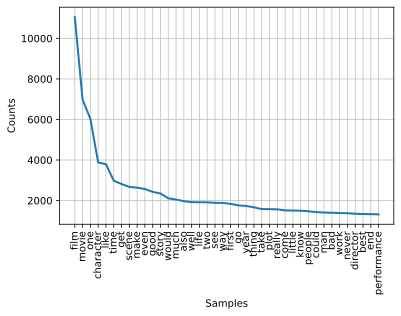

In [ ]:
counts.plot(40, cumulative=False)

Otra forma de analizar la frecuencia de aparición de las palabras en el corpus es dibujando una nube llena de muchas palabras de diferentes tamaños, que representan la frecuencia o la importancia de cada palabra. Esto es lo que se conoce como **word cloud** o **nube de palabras**.

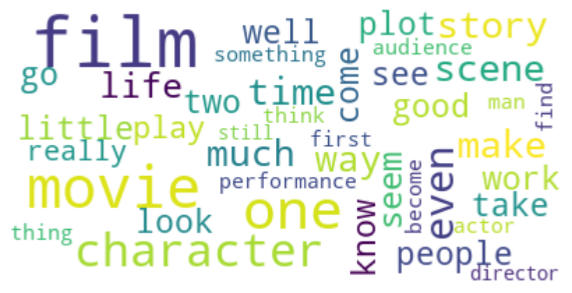

In [ ]:
from wordcloud import WordCloud

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=40, background_color="white").generate(' '.join(tokens_corpus))

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 3.2 Bag of Words (BoW)

Si este análisis de frecuencia lo hicieramos a nivel de documento, en vez de a nivel de corpus, nos estaría indicando la ocurrencia de cada palabra por documento. De hecho, este conteo de palabras por documento es lo que se conoce como **bag-of-words** (bolsa de palabras) o, de manera abreviada, como **BoW**. En concreto, **bag-of-words** es una representación de texto que describe la ocurrencia de palabras dentro de un documento. 

Se llama "bolsa de palabras", porque cualquier información sobre el orden o la estructura de las palabras en el documento es descartada. El modelo sólo se ocupa de si las palabras conocidas aparecen (y cuántas veces lo hacen) en el documento, no del orden en que aparecen.

Para obtener la representación BoW podemos utilizar varias librerías. En esta sección comenzaremos viendo cómo usar la librería de [`gensim`](https://pypi.org/project/gensim/) diseñada específicamente para el procesado de texto, permitiendo un procesado muy eficiente para grandes corpus e incluyendo funcionalides adicionales de gran utilidad. Después explicaremos como hacer este mismo proceso con `sklearn`. 


El proceso de generación del BoW tiene dos pasos:
1. Generación del vocabulario del corpus. Este vocabulario se genera mediante un **diccionario** que almacena de manera ordenada un vocabulario de palabras conocidas (a nivel de corpus).
2. **Vectorización de documentos** o generación del BoW. Se calcula una medida de la presencia de palabras conocidas (las que están en el vocabulario); para ello, realiza  un conteo del número de veces que cada palabra del diccionario aparece dentro de cada documento.

De este modo, por cada documento vamos a obtener un vector (array) del tamaño del diccionario, donde cada elemento del vector (array) va a sociada a un token del diccionario.

Veamos a continuación, cómo implementar estos pasos: 


### Generación del diccionario

In [ ]:
import gensim

# Create dictionary of tokens: the input is the preprocessed corpus 
D = gensim.corpora.Dictionary(corpus_prec)
n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(20):
    print(str(n), ':', D[n])

The dictionary contains 34872 terms
First terms in the dictionary:
0 : 10
1 : 2
2 : 20
3 : 3
4 : 4
5 : 7
6 : 8
7 : 9
8 : accident
9 : actor
10 : actually
11 : ago
12 : also
13 : although
14 : always
15 : american
16 : apparently
17 : apparition
18 : applaud
19 : arrow


Como vemos, el diccionario no es más que una lista de palabras. Pero el orden de esta lista será muy importante para la vectorización de cada documento, ya que generaremos tuplas de (`id`, `conteo`) y los `id` serán las posiciones de estas palabras en el diccionario.

### Gestión del Vocabulario

A medida que el tamaño del vocabulario aumenta, también lo hace la representación vectorial de los documentos. En el ejemplo anterior, la longitud del vector de los documentos es igual al número de palabras conocidas.

Para un corpus muy grande, como miles de documentos, la longitud del vector que representará cada documento puede ser de miles o cientos de miles de posiciones. 

Además, cada documento puede contener muy pocas de las palabras conocidas en el vocabulario, lo que dificulta el procesamiento. 

Para evitar esto, es recomendable analizar el diccionario y eliminar tokens que no resulten relevantes: marcas de puntuación que todavía queden o términos que aparecen en muy pocos casos (por lo que son términos poco informativos) o, incluso, tokens que figuran en todos los documentos del corpus (y no son discriminativos). 




El diccionario de Gensim nos permite filtrar estos términos fácilmente:

* `.filter_tokens()` nos permite indicar con el parámetro `bad_ids` la lista de ids de las palabras a eliminar o con `good_ids` la lista de los ids de las palabras a dejar en el diccionario (eliminando el resto).

* `.filter_extremes()` permite eliminar palabras/tokens poco o muy frecuentes indicando con los parámetros:
  * `no_below`: se queda con el número de tokens que están contenidas en al menos `no_below` documentos.
  * `no_above`:  se queda con el porcentaje  (fracción del tamaño total del corpus, no un número absoluto) de tokens que no están en más de `no_above` documentos.
  * `keep_n`: directamente se queda con los `keep_n` tokens más frecuentes.
  * `keep_tokens`: listado de tokens que deben permanecer en el diccionario después de ser filtradas.

Veamos cómo utilizar estas dos funcionalidades...

In [ ]:
D.filter_tokens(bad_ids=range(8))  # quitamos los números que aparecen al principio
n_tokens = len(D)
print('The dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])

The dictionary contains 34864 terms
First terms in the dictionary:
0 : accident
1 : actor
2 : actually
3 : ago
4 : also
5 : although
6 : always
7 : american
8 : apparently
9 : apparition


In [ ]:
no_below = 5 #Minimum number of documents to keep a term in the dictionary
no_above = .75 #Maximum proportion of documents in which a term can appear to be kept in the dictionary

D.filter_extremes(no_below=no_below,no_above=no_above, keep_n=1500)
n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')

print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])

The dictionary contains 1500 terms
First terms in the dictionary:
0 : accident
1 : actor
2 : actually
3 : ago
4 : also
5 : although
6 : always
7 : american
8 : apparently
9 : attempt


Esto elimina todas los tokens en el diccionario que:
1. Están en menos de `no_below=5` documentos  
2. Están en más de `no_above=0.75` ($75\%$) de documentos.
3. Después de (1) y (2), guarda sólo los primeros `keep_n` tokens más frecuentes (o guarda todos si `keep_n=None`).



#### **Ejercicio 6**: Refinando el diccionario
A continuación, vamos a volver a generar el diccionario de nuestro corpus y analizar la aparición de palabras por documento. A partir de este análisis decida qué palabras eliminaría del diccionario y use las funciones anteriores para refinar el diccionario y dejar un máximo de 2000 palabras.

Para este análisis usamos algunos de los métodos de la clase diccionario de gensim como `dfs` (calcula en cuántos documentos del corpus aparece cada palabra del vocabulario). Puede ver la ayuda en este [link](https://radimrehurek.com/gensim/corpora/dictionary.html).

In [ ]:
# Recompute the dictionary
D = gensim.corpora.Dictionary(corpus_prec)
n_tokens = len(D)
print(n_tokens)

34872


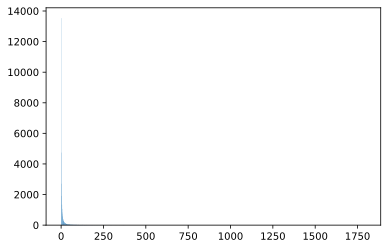

In [ ]:
# Analize the word frequency per document 
plt.hist(D.dfs.values(),2000)
plt.show()
# we have 2000 documents, some words are in most of them -> no_above= 0.75-0.8 
# There are many words (more than 12000) into a single document -> no_below = 10
# Just to clean and reduce complexity n_keep=2000

In [ ]:
# Incluya aqui su código para limpiar el diccionario
#<SOL>
no_below = 10 #Minimum number of documents to keep a term in the dictionary
no_above = .8 #Maximum proportion of documents in which a term can appear to be kept in the dictionary
keep_n = 2000
D.filter_extremes(no_below=no_below,no_above=no_above, keep_n = keep_n)
n_tokens = len(D)
print(n_tokens)
#</SOL>

2000


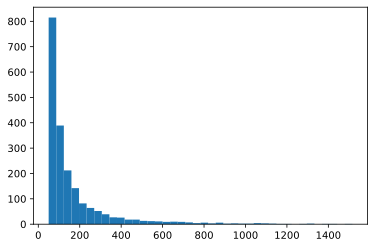

In [ ]:
# Analize the word frequency per document again to check your solution
plt.hist(D.dfs.values(),40)
plt.show()

### Vectorización de los documentos

Una vez definido nuestro diccionario, el último paso es generar el BoW. Para ello, para cada documento, tenemos que generar un vector de longitud el vocabulario y en cada posición un valor con el conteo o número de veces que esa palabra aparece en el documento. De este modo, cada documento se transforma en una lista de tuplas `(id, n)`, donde `id` es el id de la palabra dentro del diccionario y `n` el conteo de esa palabra dentro del documento. 

Para generar esta lista de tuplas vamos a usar el método `.doc2bow()`. En general, `D.doc2bow(token_list)` transforma cualquier lista de tokens en una lista de tuplas `(token_id, n)` donde `token_id` es el identificador del token (según el diccionario `D`) y `n` es el número de ocurrencias de dicho token en `token_list`. 

Veamos cómo calcular el BoW para el primer documento del corpus y analicemos la salida

In [ ]:
corpus_bow = D.doc2bow(corpus_prec[0])

print('Original document (after cleaning):')
print(corpus_prec[0])
print('Sparse vector representation (first 10 components):')
print(corpus_bow[:10])
print('Word counts for the document (first 10 components):')
list_word_counts = [(D[doc_bow[0]], doc_bow[1]) for doc_bow in corpus_bow[:10]]
print(list_word_counts)

Original document (after cleaning):
['plot', 'two', 'teen', 'couple', 'go', 'church', 'party', 'drink', 'drive', 'get', 'accident', 'one', 'guy', 'dy', 'girlfriend', 'continues', 'see', 'life', 'nightmare', 'deal', 'watch', 'movie', 'sorta', 'find', 'critique', 'mind', 'fuck', 'movie', 'teen', 'generation', 'touch', 'cool', 'idea', 'present', 'bad', 'package', 'make', 'review', 'even', 'harder', 'one', 'write', 'since', 'generally', 'applaud', 'film', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'way', 'making', 'type', 'film', 'folk', 'snag', 'one', 'correctly', 'seem', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'problem', 'movie', 'well', 'main', 'problem', 'simply', 'jumbled', 'start', 'normal', 'downshift', 'fantasy', 'world', 'audience', 'member', 'idea', 'going', 'dream', 'character', 'coming', 'back', 'dead', 'others', 'look', 'like', 'dead', 'strange', 'apparition', 'disappearance', 'looooot', 'chase', 'scene', 'ton

#### **Ejercicio 7**: Obtenga el BoW de todos los documentos del corpus

Almacene la salida en una lista llamada `corpus_bow` donde cada elemento de la lista sea el BoW de un documento, para a continuación poder analizar la salida y representarla.

In [ ]:
#<SOL>
corpus_bow = [D.doc2bow(doc) for doc in corpus_prec]
#</SOL>

In [ ]:
n_doc=50
print('Original document (after cleaning):')
print(corpus_prec[n_doc])
print('Sparse vector representation (first 10 components):')
print(corpus_bow[n_doc][:10])
print('Word counts for the document (first 10 components):')
list_word_counts = [(D[doc_bow[0]], doc_bow[1]) for doc_bow in corpus_bow[n_doc][:10]]
print(list_word_counts)


Original document (after cleaning):
['giant', 'two', 'movie', 'price', 'one', 'neither', 'worth', 'cost', 'admission', 'even', 'get', 'free', 'lamely', 'directed', 'michael', 'lehmann', 'picture', 'try', 'comedy', 'using', 'reusing', 'every', 'giant', 'joke', 'book', 'without', 'goliath', 'david', 'punk', 'throwing', 'rock', 'languidly', 'paced', 'throughout', 'movie', 'becomes', 'increasingly', 'lugubrious', 'screenplay', 'david', 'seltzer', 'omen', 'meander', 'toward', 'sad', 'ending', 'since', 'rarely', 'funny', 'convincingly', 'dramatic', 'filmmaker', 'thought', 'remains', 'mystery', 'nice', 'visuals', 'nothing', 'recommend', 'picture', 'great', 'film', 'comedy', 'belt', 'harry', 'met', 'sally', 'original', 'city', 'slicker', 'billy', 'crystal', 'shown', 'world', 'best', 'oscar', 'host', 'however', 'propensity', 'choosing', 'hopeless', 'material', 'last', 'year', 'father', 'day', 'year', 'giant', 'one', 'wonder', 'read', 'script', 'agreeing', 'go', 'ahead', 'project', 'surely', 're

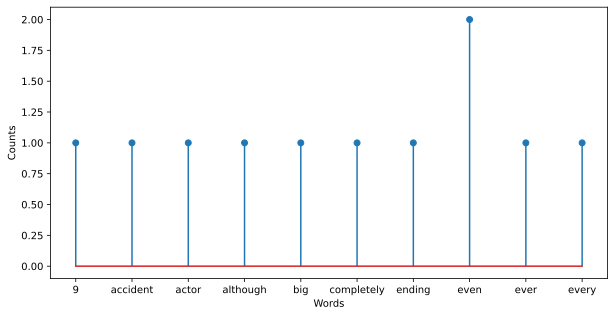

In [ ]:
(words, counts) = zip(*list_word_counts)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

## 3.3 Representación TF-IDF 

Un problema del BoW es que la frecuencia de las palabras muy frecuentes empiezan a dominar en el documento respecto al resto; por ejemplo, verbos muy comunes o términos habituales en el contexto del corpus pero no tienen tanto "contenido informativo" para el modelo como pueden ser palabras más raras pero tal vez específicas del dominio. Al realizar la gestión del vocabulario hemos visto que podemos eliminar estas palabras tan frecuentes, pero este proceso es bastante manual y es preferible tener una vectorización robusta a esto.

Para ello, la representación TF-IDF (Term Frequency–Inverse Document Frequency) propone reajustar la frecuencia de las palabras en función de la frecuencia con que aparecen en todos los documentos, de modo que se penalicen las puntuaciones de palabras frecuentes si también son frecuentes en todos los documentos. Para ello, el TF-IDF implica el cálculo de dos valores:


**Frecuencia de término (TF)**

Por frecuencia de término $\text{TF}(w)$ nos referimos al número de veces que una palabra $w$ dada ocurre en un documento (directamente el valor que da el BoW). 

En ocasiones, se redefine este factor diviendo por el número total de palabras en dicho documento o por la frecuencia máxima de algún término de ese documento (para penalizar a los docuemntos largos):
$$ \text{TF}(w,d) =\frac{\text{# veces que $w$ aparece en el documento $d$}}{\text{# total de palabras en el documento $d$}}$$

**Frecuencia de Documento Inversa (IDF)**

Es una medida de cuánta información proporciona la palabra $w$, es decir, si es común o rara en todos los documentos del corpus $D$. Se calcula de la siguiente manera:
$$ \text{IDF}(w,D) =\log \frac{\text{# documentos en el corpus}}{1+\text{# documentos donde la palabra $w$ aparece}}$$
 
A partir de estos valores el **TF-IDF** se calcula de la siguiente manera:

$$\text{TF-IDF}(w,d,D) = \text{TF}(w,d) * \text{IDF}(w,D)$$

Un peso alto en TF-IDF se consigue cuando la palabra tiene una frecuencia alta en el documento y, a la vez, una frecuencia baja en el corpus; por lo tanto, los pesos tienden a filtrar los términos que son comunes a muchos documentos. 

Obsérvese que, a diferencia de la codificación BoW, para el TF-IDF tenemos que aprender la codificación conjuntamente con todo el corpus. No obstante, una vez que hemos calculado el BoW para todos los documentos, aprender el modelo TF-IDF es sencillo usando la función [TfidfModel](https://radimrehurek.com/gensim/models/tfidfmodel.html) de Gensim.

In [ ]:
from gensim.models import TfidfModel

# fit TFIDF model for all the corpus
model = TfidfModel(corpus_bow)  

# apply model to the first corpus document
vector = model[corpus_bow[0]]  # apply model to the first corpus document
print(vector)



[(0, 0.5159483606943945), (1, 0.04375961224392465), (2, 0.06775984299381715), (3, 0.05774209495523565), (4, 0.06374962917193427), (5, 0.142395373460841), (6, 0.06850638013693702), (7, 0.15647742370864862), (8, 0.06876102475765185), (9, 0.019976591692246578), (10, 0.05427867575808996), (11, 0.05266873485234808), (12, 0.013597715016943098), (13, 0.02899590676655226), (14, 0.032866648635388684), (15, 0.03697448933602244), (16, 0.10413119495498302), (17, 0.03615721875376006), (18, 0.04406521272646172), (19, 0.05899286299382348), (20, 0.02173517186198995), (21, 0.0413373982796492), (22, 0.06611145528995602), (23, 0.024336486289227896), (24, 0.11705633661981017), (25, 0.032092456245203564), (26, 0.06775984299381715), (27, 0.04766419906825547), (28, 0.05392757485263739), (29, 0.021683625371113464), (30, 0.054989827811851806), (31, 0.07361927645137416), (32, 0.0926885757451729), (33, 0.03770028544025139), (34, 0.0621798058557054), (35, 0.07008093595332086), (36, 0.07035479952500612), (37, 0.11

#### **Ejercicio 8**: Obtenga el TF-IDF de todos los documentos del corpus

Almacene la salida en una lista llamada `corpus_tfifd` donde cada elemento de la lista sea el TF-IDF de un documento, para a continuación poder analizar la salida y representarla.

In [ ]:
#<SOL>
# apply model to all corpus document
corpus_tfidf = model[corpus_bow]  # apply model to the first corpus document
#</SOL>

Analicemos esta transformación en comparación con el BoW

In [ ]:
n_doc=50
print('Original document (after cleaning):')
print(corpus_prec[n_doc])
print('Sparse TFIDF vector representation (first 10 components):')
print(corpus_tfidf[n_doc][:10])
print('Word counts for the document (first 10 components):')
list_word_counts = [(D[doc_bow[0]], doc_bow[1]) for doc_bow in corpus_bow[n_doc][:10]]
print(list_word_counts)
print('TF-IDF for the document (first 10 components):')
list_tfidf = [(D[doc_tfidf[0]], doc_tfidf[1]) for doc_tfidf in corpus_tfidf[n_doc][:10]]
print(list_tfidf)

Original document (after cleaning):
['giant', 'two', 'movie', 'price', 'one', 'neither', 'worth', 'cost', 'admission', 'even', 'get', 'free', 'lamely', 'directed', 'michael', 'lehmann', 'picture', 'try', 'comedy', 'using', 'reusing', 'every', 'giant', 'joke', 'book', 'without', 'goliath', 'david', 'punk', 'throwing', 'rock', 'languidly', 'paced', 'throughout', 'movie', 'becomes', 'increasingly', 'lugubrious', 'screenplay', 'david', 'seltzer', 'omen', 'meander', 'toward', 'sad', 'ending', 'since', 'rarely', 'funny', 'convincingly', 'dramatic', 'filmmaker', 'thought', 'remains', 'mystery', 'nice', 'visuals', 'nothing', 'recommend', 'picture', 'great', 'film', 'comedy', 'belt', 'harry', 'met', 'sally', 'original', 'city', 'slicker', 'billy', 'crystal', 'shown', 'world', 'best', 'oscar', 'host', 'however', 'propensity', 'choosing', 'hopeless', 'material', 'last', 'year', 'father', 'day', 'year', 'giant', 'one', 'wonder', 'read', 'script', 'agreeing', 'go', 'ahead', 'project', 'surely', 're

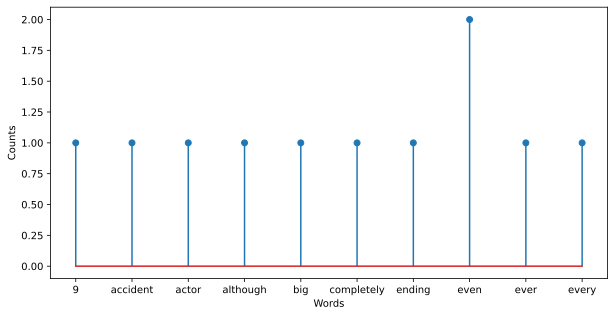

In [ ]:
#Plot BoW
(words, counts) = zip(*list_word_counts)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

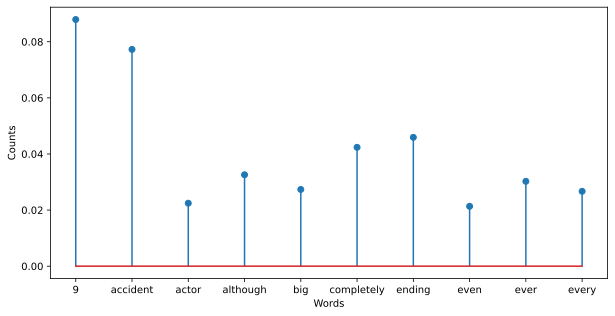

In [ ]:
#Plot Tf-IDF
(words, counts) = zip(*list_tfidf)
plt.figure(figsize=(10,5))
plt.stem(words,counts, use_line_collection = True)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

Compare ambas representaciones... ¿Qué palabras tenían más/menos peso en la representación BoW? ¿Y en la representación TF-IDF? 

## 3.4 BOW y TF-IDF en sklearn

Sklearn también incuye funciones para hacer la tokenización y vectorización de documentos. En concreto, tiene las funciones:
*  [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) que implementa tanto la tokenización como el recuento de palabras (BoW) en una sola clase.
* [`TfidfTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer) que se encarga de obtener la representación TF-IDF a partir de una representación BoW.

* [`TfidfVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer) que equivale a usar `CountVectorizer()` seguido de `TfidfTransformer()`.

Veamos cómo funcionan estos métodos y qué nos permiten hacer.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# We start from a raw corpus
corpus_example = [
     'This is the first document of my book.',
     'This document is a new document.',
     'And this is the document 3.',
     'Is this the best document??']

# Define the CountVectorizer method
vectorizer = CountVectorizer()
# and fit it!
vectorizer.fit(corpus_example)
# Now, we can obtain the bow of any text (or the corpus)
X = vectorizer.transform(corpus_example)
print(X.toarray()) # By default, it is a sparse matrix

[[0 0 1 1 1 1 1 0 1 1 1]
 [0 0 0 2 0 1 0 1 0 0 1]
 [1 0 0 1 0 1 0 0 0 1 1]
 [0 1 0 1 0 1 0 0 0 1 1]]


In [ ]:
# We can access to the vocabulary
vectorizer.vocabulary_

{'this': 10,
 'is': 5,
 'the': 9,
 'first': 4,
 'document': 3,
 'of': 8,
 'my': 6,
 'book': 2,
 'new': 7,
 'and': 0,
 'best': 1}

La configuración por defecto tokeniza cada texto, convierte todo a minúsculas y  extrae palabras de al menos 2 letras (vemos que ha eliminado `'a'` y `'3'` por ser tokens con un único caracter); además, elimina la puntuación. 

Si queremos, `CountVectorizer` nos deja incluir algunas funcionalidades adicionales como:
* Incluir una lista de *stop words* con el parametro `stop_words`
* Refinar el diccionario de manera similar a como nos deja Gensim con los siguientes parámetros:
  * `min_df`: umbral para ignorar los términos que aparecen en menos de  `min_df` documentos.
  * `max_df`: umbral para ignorar los términos que aparecen en más de  `max_df` documentos.  
  * `max_features`: número de términos a incluir en el diccionario (se queda con las `max_features` palabras más frecuentes).
* Incluir n-gramas, pero a diferencia de como lo hemos en el preprocesado con NLTK, lo que hace es incluir todas las combinaciones de tokes que aparecen consecutivos. Para ello, en el parámetro `ngram_range`  podemos indicar la longitud mínima y máxima de los n-gramas a analizar. 


En el siguiente ejemplo vemos como incluir un filtrado de *stop words* y generar n-gramas de longitud 1 y 2. 


In [ ]:
# Incluimos n-gramas de longitud mínima 1 y máxima de 2 
vectorizer2 = CountVectorizer(stop_words='english', ngram_range=(1, 2))
X2 = vectorizer2.fit_transform(corpus_example)
print(vectorizer2.get_feature_names())

['best', 'best document', 'book', 'document', 'document book', 'document new', 'new', 'new document']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


A pesar de todas estas funcionalidades, puede ocurrir que queramos incluir pasos adicionales en nuestro preprocesado (tratamiento de acentos, contracciones, números, ...) y para ello no sea suficiente con configurar estos parámetros. En este caso tenemos dos opciones:
* Utilizar NLTK + Gensim
* Incluir nuestro preprocesado con NLTK sobre la clase de sklearn.

Para llevar a cabo esta segunda opción, lo más sencillo es definir una clase u objeto encargada de aplicar el preprocesado deseado y pasárselo a `CountVectorizer` en el parámetro `analyzer`. Veamos cómo aplicarlo con nuestro ejemplo.

In [ ]:
# create a custom analyzer class
class MyTextPreprocessing(object):
    
    def __init__(self):
        ## Load Modules
        self.lemmatizer  = WordNetLemmatizer()
        self.stopwords_en   = set(nltk.corpus.stopwords.words('english'))
        self.punctuation = string.punctuation
        
    # allow the class instance to be called just like
    # a function that applies the preprocessing 
    def __call__(self, text):
        text2 = text.translate(str.maketrans(self.punctuation, ' '*(len(self.punctuation))))
        text_nonum = re.sub(r'\d+', '', text2) # Remove numbers
        text_tokens = nltk.word_tokenize(text_nonum)
        text_clean = [token.lower() for token in  text_tokens if (token.lower() not in self.stopwords_en)] 
        normalized_text = [self.lemmatizer.lemmatize(t) for t in text_clean]
        return normalized_text
    
analyzer = MyTextPreprocessing()
custom_vec = CountVectorizer(analyzer=analyzer)
X_example = custom_vec.fit_transform(corpus_example)
tokens = custom_vec.get_feature_names()
print(tokens)

['best', 'book', 'document', 'first', 'new']


Si lo aplicamos sobre nuestro corpus de documentos

In [ ]:
# Leemos todo el corpus
corpus = []
for fileid in movie_reviews.fileids():
  text = movie_reviews.raw(fileid)
  corpus.append(text)

# Incluimos la limpieza del diccionario
no_below = 10 #Minimum number of documents to keep a term in the dictionary
no_above = .8 #Maximum proportion of documents in which a term can appear to be kept in the dictionary
keep_n = 2000

analyzer = MyTextPreprocessing()
custom_vec = CountVectorizer(analyzer=analyzer, min_df= no_below, max_df =no_above, max_features= keep_n)
X_bow = custom_vec.fit_transform(corpus)
tokens = custom_vec.get_feature_names()
print(tokens)

['ability', 'able', 'absolutely', 'academy', 'accent', 'accept', 'accident', 'across', 'act', 'acted', 'acting', 'action', 'actor', 'actress', 'actual', 'actually', 'ad', 'adam', 'adaptation', 'add', 'added', 'addition', 'admit', 'adult', 'adventure', 'affair', 'affleck', 'african', 'age', 'agent', 'ago', 'ahead', 'air', 'al', 'alan', 'alex', 'alice', 'alien', 'alive', 'allen', 'allow', 'allowed', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'amazing', 'america', 'american', 'among', 'amount', 'amusing', 'amy', 'anderson', 'andrew', 'angel', 'angle', 'angry', 'animal', 'animated', 'animation', 'anna', 'anne', 'annie', 'annoying', 'another', 'answer', 'anthony', 'anti', 'anyone', 'anything', 'anyway', 'apart', 'apartment', 'ape', 'apparent', 'apparently', 'appeal', 'appealing', 'appear', 'appearance', 'appears', 'appreciate', 'approach', 'appropriate', 'area', 'arm', 'armageddon', 'army', 'arnold', 'around', 'arrives', 'art', 'artist', 'as', 'aside', 'a

In [ ]:
print('Original document')
print(corpus[0][:100])
print('Sparse vector representation (first 10 components):')
print(X_bow[0,:].data[:10])
print('Pair of words a count values (first 10 components):')
list_word_counts = [(tokens[index], X_bow[0,index]) for index in X_bow[0,:].indices[:10]]
print(list_word_counts)



Original document
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 

Sparse vector representation (first 10 components):
[1 2 4 1 2 1 1 1 3 1]
Pair of words a count values (first 10 components):
[('plot', 1), ('two', 2), ('teen', 4), ('couple', 1), ('go', 2), ('church', 1), ('party', 1), ('drive', 1), ('get', 3), ('accident', 1)]


Si a partir del BoW queremos obtener el TF-IDF, podemos usar la función `TfidfTransformer`

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
vectorizerTFIDF = TfidfTransformer()
vectorizerTFIDF.fit(X_example)
X_tfidf_example =  vectorizerTFIDF.transform(X_example)
print(X_tfidf_example.toarray())

[[0.         0.66338461 0.34618161 0.66338461 0.        ]
 [0.         0.         0.722056   0.         0.69183461]
 [0.         0.         1.         0.         0.        ]
 [0.88654763 0.         0.46263733 0.         0.        ]]


Podemos incluirlo todo en un pipeline

*Nota*: Un **pipeline** es un método de sklearn que nos permite definir una secuencia de funciones y trabajar con ellas como un única, facilitando el entrenamiento, validación y testeo de modelos compuestos por secuencias de métodos.

In [ ]:
from sklearn.pipeline import Pipeline
# Define the steps of the pipeline
pipe = Pipeline([('count', CountVectorizer()),
                  ('tfid', TfidfTransformer())])
# Train all the steps of the pipeline
pipe.fit(corpus_example)       
# Get new outputs of the overall pipeline         
pipe.transform(corpus_example).toarray()


array([[0.        , 0.        , 0.43750519, 0.22830836, 0.43750519,
        0.22830836, 0.43750519, 0.        , 0.43750519, 0.27925389,
        0.22830836],
       [0.        , 0.        , 0.        , 0.64308448, 0.        ,
        0.32154224, 0.        , 0.61616842, 0.        , 0.        ,
        0.32154224],
       [0.67049706, 0.        , 0.        , 0.34989318, 0.        ,
        0.34989318, 0.        , 0.        , 0.        , 0.42796959,
        0.34989318],
       [0.        , 0.67049706, 0.        , 0.34989318, 0.        ,
        0.34989318, 0.        , 0.        , 0.        , 0.42796959,
        0.34989318]])

O directamente utilizar la clase `TfidfVectorizer`

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit_transform(corpus_example).toarray()


array([[0.        , 0.        , 0.43750519, 0.22830836, 0.43750519,
        0.22830836, 0.43750519, 0.        , 0.43750519, 0.27925389,
        0.22830836],
       [0.        , 0.        , 0.        , 0.64308448, 0.        ,
        0.32154224, 0.        , 0.61616842, 0.        , 0.        ,
        0.32154224],
       [0.67049706, 0.        , 0.        , 0.34989318, 0.        ,
        0.34989318, 0.        , 0.        , 0.        , 0.42796959,
        0.34989318],
       [0.        , 0.67049706, 0.        , 0.34989318, 0.        ,
        0.34989318, 0.        , 0.        , 0.        , 0.42796959,
        0.34989318]])

# 4. Clasificación de textos con *Naive Bayes*

Una vez que tenemos la representación vectorial de nuestros documentos, podemos usar esta representación para aprender un modelo de aprendizaje.  Son muchos los modelos que podemos usar en este problema para clasificar nuestras reviews en positivas y negativas, pero a cotinuación vamos a ver el modelo Naive Bayes, ya que es una estrategia bastante habitual y eficiente para la clasificación de documentos a pesar de llamarse "ingenua" (*naive*).

Si en nuestras reviews de películas aparecen los términos *encantar*, *genial*, *impresionante*, *sorprendente*, ¿cuál es la probabilidad de que la review sea positiva? ¿es mayor que la probabilidad de que sea negativa?

Básicamente un clasificador bayesiano aprenderá las probabilidades de que la review sea mala/buena a la vista de las palabras que la forman (las probabilidades a posteriori de cada clase), es decir, aprenderá:
* Probabilidad de que el documento $i$-ésimo sea positivo a la vista del contenido del documento (las palabras que lo forman, su BoW, TF-IDF, ...): $ P(y_i=1|{\bf x}_i)$
* Probabilidad de que el documento $i$ sea negativo a la vista de su contenido: $ P(y_i=-1|{\bf x}_i)$

Y, entonces, el clasificador decidirá que el documento $i$-ésimo pertenece a la clase positiva ($m=1$) o negativa ($m=-1$) (o en un caso  general multiclase a $m=1, \ldots, M$)  aplicando un criterio MAP:

$$\hat{y}_i = argmax_m P(y_i=m|{\bf x}_i)$$

Para calcular estas probabilidades a posteriori se aplica el Teorema de Bayes, de modo que:
$$ P(y=m|{\bf x}) = \frac{P(y=m) p({\bf x}|y=m)}{p({\bf x})}$$

El modelo Navie Bayes simplifica el cálculo de estas probabilidades considerando que la probabilidad de que cada palabra aparezca en un documento de la clase $m$ como si fuera independiente de la probabilidad de que aparezca cualquier otra palabra, de modo que 

$$p({\bf x}|y=m) = \prod_{d=1}^{D}{p(x_d|y=m) } $$

Lo que lleva a que el clasificador MAP se pueda obtener como:


$$\hat{y} = argmax_m P(y=m|{\bf x}) = argmax_m  P(y=m) \prod_{d=1}^{D}{p(x_d|y=m)}$$


Esta suposición de independencia casi nunca es cierta en los documentos que queremos clasificar, ya que el propio lenguaje, reglas gramaticales y la sintaxis suele generar correlaciones entre las palabras.
Sin embargo, a pesar de eso los clasificadores *Naive Bayes* funcionan bastante bien para la clasificación de documentos. Esto se debe principalmente a que al desacoplar las distribuciones de cada palabra solo tenemos que estimar parámetros de distribuciones unidimensionales, lo que permite estimar los parámetros necesarios con pocos datos de entrenamiento. Además esto hace que 
sean bastante más rápidos que otros métodos más sofisticados.


Sklearn incluye varias implementaciones de clasificadores Naive Bayes considerando diferentes tipos de distribuciones, pero para trabajar con representaciones vectoriales de textos, las implementaciones más habituales son las siguientes:
* *Multinomial Naive Bayes* 
* *Complement Naive Bayes*


### 4.1 *Multinomial Naive Bayes* 

El clasificador [`MultinomialNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)  directamente estima frecuencialmente las probabilidades de que la palabra $d$ aparezca en un documento de la clase $y$, es decir,
$$ \hat{p}(x_d|y=m) = \frac{N_{d,m} + \alpha}{N_m + \alpha D} $$
donde $N_{d,m}$ es el número de veces que la palabra $d$ parece en todos los documentos de la clase $m$, $N_m = \sum_{d=1}^D N_{d,m}$ es el número total de palabras en todos los documentos de la clase $m$ y $\alpha$ es un parametro de suavizado para evitar divisiones entre cero. Los valores de $N_{d,m}$ se pueden obtener directamente a partir de la representación BoW de cada documento, pero si se utilizan representaciones TF-IDF también se obtienen buenos resultados. 

### 4.2 *Complement Naive Bayes*

[`ComplementNB`](https://scikit-learn.org/stable/modules/naive_bayes.html#complement-naive-bayes) es una adaptación del algoritmo anterior  para trabajar sobre las probabilidades complementarias de cada clase; de este modo, tiende a proporcionar estimaciones más estables de las probabilidades de cada palabra, principalmente en problemas desbalanceados, tendiendo a mejorar considerablemente la versión anterior.

En este caso el modelo decide según la regla:

$$\hat{y} = argmin_m P(y \neq m|{\bf x}) = argmax_m  P(y \neq m) \prod_{d=1}^{D}{p_c(x_d|m)}$$

donde $p_c(x_d|m)$ es la probabilidad complementaria de la clase $m$ y se aproxima con:

$$ p_c(x_d|m) = \frac{w_{d,m}}{\sum_{m' = 1}^M w_{d,m'}}$$

siendo $w_{d,m}$ el peso complementario de la palabra $d$ en la clase $m$ dado por:

$$w_{d,m} = \log{ \frac{\sum_{m' \neq m} N_{d,m'} + \alpha_d}{\sum_{d'} \sum_{m' \neq m} N_{d',m'} + \sum_{d'} \alpha_{d'}}} $$

donde al igual que antes los valores de $N_{d,m}$ se pueden obtener directamente a partir de la representación BoW o TFIDF de cada documento.

Vemos como usar estos clasificadores con nuestro corpus de datos. Para ello, empecemos cargando las etiquetas del problema.

In [ ]:
Y = []
for fileid in movie_reviews.fileids():
  if movie_reviews.categories(fileid)[0]=='neg':
    Y.append(-1)
  else:
    Y.append(1)
Y = np.array(Y)
print(Y)

[-1 -1 -1 ...  1  1  1]


En segundo lugar, si usamos la vectorización que hemos hecho con Gensim, para poder usar las librerías de sklearn, tenemos que convertir nuestra representación vectorial en numpy arrays. Para ello, gensim nos incluye dos funciones: [corpus2dense](https://tedboy.github.io/nlps/generated/generated/gensim.matutils.corpus2dense.html), [corpus2csc](https://tedboy.github.io/nlps/generated/generated/gensim.matutils.corpus2csc.html)

In [ ]:
from gensim.matutils import corpus2dense, corpus2csc

n_tokens = len(D)
num_docs = len(corpus_bow)
# Convert BoW representacion
corpus_bow_dense = corpus2dense(corpus_bow, num_terms=n_tokens, num_docs=num_docs).T
corpus_bow_sparse = corpus2csc(corpus_bow, num_terms=n_tokens, num_docs=num_docs).T
# Convert TFIDF representacion
corpus_tfidf_dense = corpus2dense(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs).T
corpus_tfidf_sparse = corpus2csc(corpus_tfidf, num_terms=n_tokens, num_docs=num_docs).T

Veamos qué han hecho estas transformaciones, por ejemplo, para la representación BoW: 

In [ ]:
print(corpus_bow[50])

[(7, 1), (8, 1), (9, 1), (13, 1), (23, 1), (33, 1), (51, 1), (57, 2), (58, 1), (59, 1), (74, 3), (79, 1), (81, 3), (85, 2), (92, 1), (94, 1), (96, 1), (97, 1), (98, 3), (122, 1), (124, 1), (133, 1), (137, 1), (138, 2), (140, 1), (148, 1), (163, 1), (164, 1), (165, 1), (169, 1), (175, 1), (177, 1), (182, 1), (183, 2), (185, 2), (189, 1), (190, 1), (210, 1), (212, 1), (219, 1), (224, 1), (229, 1), (234, 1), (242, 1), (243, 1), (245, 2), (281, 1), (287, 1), (294, 1), (296, 3), (311, 1), (313, 2), (333, 1), (355, 2), (367, 1), (372, 1), (383, 1), (384, 1), (400, 1), (413, 1), (417, 2), (419, 1), (441, 1), (447, 1), (454, 1), (461, 1), (468, 1), (498, 1), (516, 2), (517, 1), (526, 1), (533, 2), (537, 2), (551, 1), (552, 1), (576, 1), (600, 1), (632, 1), (649, 1), (652, 1), (659, 2), (700, 4), (703, 1), (707, 1), (718, 1), (739, 1), (752, 1), (756, 4), (772, 1), (773, 1), (782, 2), (795, 1), (801, 1), (823, 1), (832, 2), (842, 2), (853, 1), (859, 1), (863, 1), (876, 1), (889, 1), (893, 1), (

In [ ]:
print(corpus_bow_dense[50,:20])

[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(corpus_bow_sparse[50,:20])

  (0, 7)	1.0
  (0, 8)	1.0
  (0, 9)	1.0
  (0, 13)	1.0


En general, cuando tengamos grandes corpus de datos, nos interesará manejar la representación dispersa o sparse de los datos para ahorrar en coste computacional. Si en nuestro procesado de ML usamos sklearn podremos trabajar con este formato sparse ya que la mayoría de clasificadores/regresores puede trabajar con ambos datos (densos y dispersos).



#### **Ejercicio 9**: Entrene un clasificador *Navie Bayes* y *Complement Navie Bayes* 

Complete el siguiente código para entrenar y evaluar los clasificadores *Navie Bayes* vistos anteriormente. El código comienza dividiendo los conjuntos de datos en entrenamiento y test para que pueda evaluar las prestaciones del clasificador.

In [ ]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.model_selection import train_test_split
# Code for BoW representation

# Divide the data into train test partitions
X_train, X_test, y_train, y_test = train_test_split(corpus_bow_sparse, Y, test_size=0.4, random_state=42)

# <SOL>
clf = MultinomialNB()
clf.fit(X_train, y_train)
print('Accuracy Naive Bayes')
print(clf.score(X_test, y_test))

clf = ComplementNB()
clf.fit(X_train, y_train)
print('Accuracy Complement Naive Bayes')
print(clf.score(X_test, y_test))

# </SOL>

Accuracy Naive Bayes
0.83125
Accuracy Complement Naive Bayes
0.83125


In [ ]:
# Code for TF-IDF representation

# Divide the data into train test partitions
X_train, X_test, y_train, y_test = train_test_split(corpus_tfidf_sparse, Y, test_size=0.4, random_state=42)

# <SOL>
clf = MultinomialNB()
clf.fit(X_train, y_train)
print('Accuracy Naive Bayes')
print(clf.score(X_test, y_test))

clf = ComplementNB()
clf.fit(X_train, y_train)
print('Accuracy Complement Naive Bayes')
print(clf.score(X_test, y_test))
# </SOL>

Accuracy Naive Bayes
0.82375
Accuracy Complement Naive Bayes
0.825


Al ser un problema binario, no hay diferencias entre la implementación Naive Bayes y su complementaria. Además, en este caso, tampoco vemos diferencias entre usar la representación BoW y el TF-IDF, pero como veremos a lo largo del curso la representación TF-IDF suele proporcionar mejores resultados.